# **`Attention` is all you need**
### **A simplied self attention mechanism without trainable weights**

NB: lecture note found here **[🔹 Lecture 13 Notes 🔹](lecture_13_notes.md)** and **[🔹 Lecture 14 Notes 🔹](lecture_14_notes.md)**


In [1]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Corresponding words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step']

inputs = torch.tensor(
  [
   [0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55], # step     (x^6)
  ]
)


In [3]:
inputs.shape

torch.Size([6, 3])

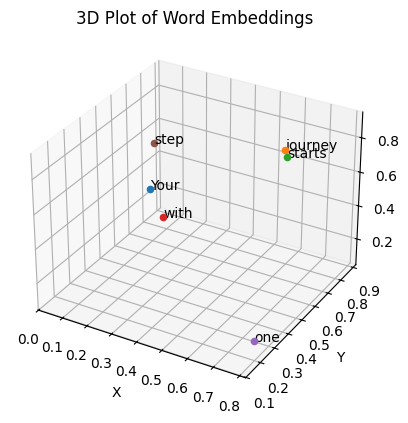

In [4]:
# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()


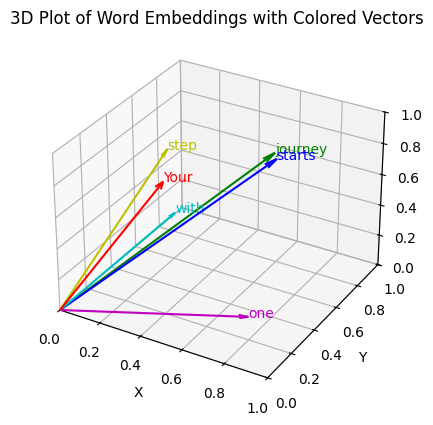

In [5]:

# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'r']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()

In [ ]:
# here we're trying to compute the context vector for journey
query = inputs[1] # 2nd input token

attn_scores_2 = torch.empty(inputs.shape[0]) # so .shape return an arraylike value where the very first value is the number of rows in the inputs sequence which is similar to the number words/tokens in the that particular sequence hence the [0]
print("before:", attn_scores_2)
for i, x_i in enumerate(inputs):
    print(i, "-> ", x_i)
    attn_scores_2[i] = torch.dot(x_i, query) # do the dot product to get the attention score of every token to the query vector
    
print("after: ", attn_scores_2)
print("words: ", words)
print("query: ", query)

before: tensor([-2.3131e-05,  7.5110e-43,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00])
0 ->  tensor([0.4300, 0.1500, 0.8900])
1 ->  tensor([0.5500, 0.8700, 0.6600])
2 ->  tensor([0.5700, 0.8500, 0.6400])
3 ->  tensor([0.2200, 0.5800, 0.3300])
4 ->  tensor([0.7700, 0.2500, 0.1000])
5 ->  tensor([0.0500, 0.8000, 0.5500])
after:  tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])
words:  ['Your', 'journey', 'starts', 'with', 'one', 'step']
query:  tensor([0.5500, 0.8700, 0.6600])


In [9]:
attn_scores_2, query, inputs

(tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865]),
 tensor([0.5500, 0.8700, 0.6600]),
 tensor([[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]]))

In [10]:
# normalizing attention scores using average
attn_weights_2_tmp = attn_scores_2 / attn_scores_2.sum()

print(attn_weights_2_tmp)

tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])


In [11]:
# naive softmax
def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum(dim=0)

attn_weights_2_naive = softmax_naive(attn_scores_2)
print(attn_weights_2_naive)

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])


In [12]:
# pytorch softmax
attn_weight_2 = torch.softmax(attn_scores_2, dim=0)
print(attn_weight_2)

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])


**calculating the the context vector**

In [ ]:
# context vactor for journey
query = inputs[1]
print(query)

context_vec_2 = torch.zeros(query.shape)
print(context_vec_2)
for i, x_i in enumerate(inputs):
    print(f"hmm: {context_vec_2}")
    context_vec_2 += attn_weight_2[i] * x_i
    print(f"res: {attn_weight_2[i] * x_i} = {attn_weight_2[i]} * {x_i} ")
    print(f"yoo: {context_vec_2} += {attn_weight_2[i]} * {x_i}")
    print("-----------------------------------------")
    
    
context_vec_2


tensor([0.5500, 0.8700, 0.6600])
tensor([0., 0., 0.])
hmm: tensor([0., 0., 0.])
res: tensor([0.0596, 0.0208, 0.1233]) = 0.13854756951332092 * tensor([0.4300, 0.1500, 0.8900]) 
yoo: tensor([0.0596, 0.0208, 0.1233]) += 0.13854756951332092 * tensor([0.4300, 0.1500, 0.8900])
-----------------------------------------
hmm: tensor([0.0596, 0.0208, 0.1233])
res: tensor([0.1308, 0.2070, 0.1570]) = 0.2378913015127182 * tensor([0.5500, 0.8700, 0.6600]) 
yoo: tensor([0.1904, 0.2277, 0.2803]) += 0.2378913015127182 * tensor([0.5500, 0.8700, 0.6600])
-----------------------------------------
hmm: tensor([0.1904, 0.2277, 0.2803])
res: tensor([0.1330, 0.1983, 0.1493]) = 0.23327402770519257 * tensor([0.5700, 0.8500, 0.6400]) 
yoo: tensor([0.3234, 0.4260, 0.4296]) += 0.23327402770519257 * tensor([0.5700, 0.8500, 0.6400])
-----------------------------------------
hmm: tensor([0.3234, 0.4260, 0.4296])
res: tensor([0.0273, 0.0719, 0.0409]) = 0.12399158626794815 * tensor([0.2200, 0.5800, 0.3300]) 
yoo: tenso

tensor([0.4419, 0.6515, 0.5683])

In [99]:
query.shape, context_vec_2.shape, context_vec_2

(torch.Size([3]), torch.Size([3]), tensor([0.4419, 0.6515, 0.5683]))

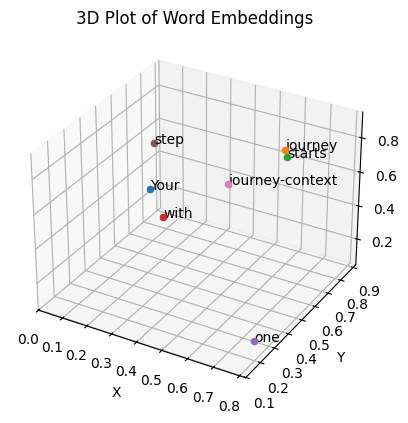

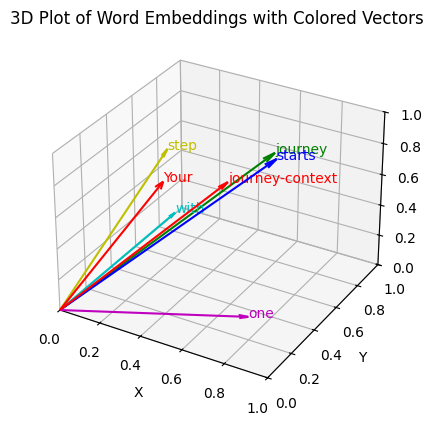

In [82]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55], # step     (x^6)
   [0.4419, 0.6515, 0.5683]]
)

# Corresponding words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step', 'journey-context']

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()

# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'r']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()

![](images/L14_s7.png)

**computing context vector for all queries**

In [7]:
# Corresponding words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step']

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55], # step     (x^6)
  ]
)


attn_scores = torch.empty(6, 6)
# print(attn_scores)
for i, x_i in enumerate(inputs):
    # print("x: ", i, x_i)
    for j, y_j in enumerate(inputs):
        # print("y: ", j, y_j)
        
        # print(f"x_i -> {x_i}, y_j -> {y_j}")     
        attn_scores[i, j] = torch.dot(x_i, y_j)        
attn_scores

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])

In [8]:
# using linear algebra matrixes.transpose... simple mean that invert it so like we had 6x3->3x6

attn_scores_matrix = inputs @ inputs.T
# attn_scores_matrix = inputs.matmul(inputs.T) # or inputs.transpose(3,6)
attn_scores_matrix

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])

In [ ]:
inputs.shape, inputs.T.shape

(torch.Size([6, 3]), torch.Size([3, 6]))

In [9]:
# the dim = -1 is the last dim in the input tensor, this is say the last dim which in the column... eg: 8x9, 9 is the dim=-1
attn_weights_scores = torch.softmax(attn_scores_matrix, -1)
# attn_weights_scores, attn_weights_scores.shape, inputs, inputs.shape
attn_weights_scores, inputs

(tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
         [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
         [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
         [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
         [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
         [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]]),
 tensor([[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]]))

In [ ]:
all_context_vec = attn_weights_scores @ inputs #6x6 @ 6x3
all_context_vec

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])